# Install and import dependencies

In [1]:
!pip3 install torch torchvision torchaudio #installing pytorch


In [2]:
!git clone https://github.com/ultralytics/yolov5  # cloning yolov5 


Cloning into 'yolov5'...
remote: Enumerating objects: 16530, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 16530 (delta 1), reused 5 (delta 0), pack-reused 16522
Receiving objects: 100% (16530/16530), 15.00 MiB | 29.60 MiB/s, done.
Resolving deltas: 100% (11360/11360), done.


In [3]:
cd yolov5

/Users/harsh/Downloads/yolov5


/Users/harsh/Library/Python/3.12/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!pip install -r requirements.txt #installing the requirements for yolov5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 20.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


In [5]:
pwd

'/Users/harsh/Downloads/yolov5'

In [6]:
!pip install ipywidgets 


# Load model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') #loading yolov5s(s = small) model


Using cache found in /Users/sanjeev/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-5-12 torch 1.11.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Make detections with images

In [6]:
img=['https://cdn.vox-cdn.com/thumbor/SLAqByY-1IyAnbvJpxug9I0JZNY=/232x0:2999x2075/920x613/filters:focal(232x0:2999x2075):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/44219366/72499026.0.0.jpg']

In [7]:
results = model(img)

In [8]:
results.print()


image 1/1: 613x920 21 cars, 2 trucks
Speed: 1786.6ms pre-process, 392.7ms inference, 27.8ms NMS per image at shape (1, 3, 448, 640)


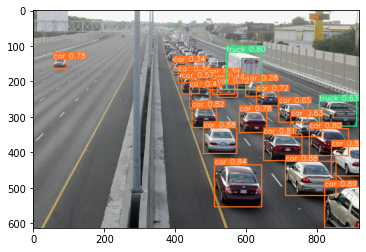

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,820.022949,497.076141,919.913391,612.890259,0.885624,2,car
1,479.530579,331.741577,573.064758,403.631805,0.876746,2,car
2,710.469055,425.512238,852.556885,521.895081,0.876550,2,car
3,510.959747,435.880463,643.002747,553.706482,0.843626,2,car
4,839.575195,383.353394,919.883179,466.531952,0.840771,2,car
5,447.064209,273.249451,515.892334,330.675385,0.823502,2,car
6,648.848938,348.478394,756.638367,423.739166,0.812843,2,car
7,777.415344,333.873047,887.311768,409.194702,0.802299,2,car
8,544.106445,118.119370,643.273865,223.274109,0.795985,7,truck
9,580.161072,285.044525,657.036865,344.084900,0.778562,2,car


# Real time detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# Train from scratch

In [11]:
import uuid #unique identifier
import os
import time

In [12]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs = 20

In [14]:
cap = cv2.VideoCapture(0)

#loop through labels
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5)
    
    #loop through image range
    for img_num in range(number_imgs):
        print('collecting images for {}, image number{}'.format(label,img_num))
        
        #webcam feed
        ret,frame = cap.read()
        
        #naming out path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #writing out image to file
        cv2.imwrite(imgname,frame)
        
        #render to the screen
        cv2.imshow('Image collection',frame)
        
        #2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
        
        

collecting images for awake
collecting images for awake, image number0
collecting images for awake, image number1
collecting images for awake, image number2
collecting images for awake, image number3
collecting images for awake, image number4
collecting images for awake, image number5
collecting images for awake, image number6
collecting images for awake, image number7
collecting images for awake, image number8
collecting images for awake, image number9
collecting images for awake, image number10
collecting images for awake, image number11
collecting images for awake, image number12
collecting images for awake, image number13
collecting images for awake, image number14
collecting images for awake, image number15
collecting images for awake, image number16
collecting images for awake, image number17
collecting images for awake, image number18
collecting images for awake, image number19
collecting images for drowsy
collecting images for drowsy, image number0
collecting images for drowsy,

In [12]:
pwd

'/Users/harsh/Downloads/yolov5'

In [2]:
!git clone https://github.com/tzutalin/labelImg.git #cloning labelImg for labelling awake and drowsy images

Cloning into 'labelImg'...
remote: Enumerating objects: 1986, done.
remote: Total 1986 (delta 0), reused 0 (delta 0), pack-reused 1986
Receiving objects: 100% (1986/1986), 232.85 MiB | 10.72 MiB/s, done.
Resolving deltas: 100% (1187/1187), done.


In [3]:
!pip install pyqt5==5.15.2 lxml #installing requirements

     |████████████████████████████████| 47.6 MB 8.0 MB/s eta 0:00:01     |████████████████████            | 29.6 MB 6.0 MB/s eta 0:00:04��████████████████            | 29.7 MB 6.0 MB/s eta 0:00:03��█████ | 46.0 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 2.9 MB/s  eta 0:00:01
You should consider upgrading via the '/Users/sanjeev/Documents/yolo/yolo/bin/python3 -m pip install --upgrade pip' command.


In [13]:
pwd

'/Users/harsh/Downloads/yolov5'

In [14]:
cd yolov5

[Errno 2] No such file or directory: 'yolov5'
/Users/harsh/Downloads/yolov5


/Users/harsh/Library/Python/3.12/lib/python/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [11]:
#training 
#!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [15]:
cd -

/Users/harsh/Downloads


In [16]:
pwd

'/Users/harsh/Downloads'

# load custom model

In [17]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5/runs/train/exp5/weights/best.pt',force_reload=True)

NameError: name 'torch' is not defined

In [19]:
img = os.path.join('data','images','drowsy.8315e66e-d170-11ec-bff9-1094bbdfb49c.jpg')

In [20]:
results = model(img)

In [21]:
results.print()

image 1/1: 720x1280 1 drowsy
Speed: 37.3ms pre-process, 307.5ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
